In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene

# DATA

In [2]:
sint = pd.read_csv('./Data/Input/DISNET/sint_all.tsv', sep='\t')
sint = sint.drop(["Unnamed: 0"],axis=1)

In [4]:
len(sint["disease_id"].unique())

7582

In [5]:
len(sint["symptom"].unique())

1951

In [6]:
### DISNET

In [7]:
disnet_sint = sint

In [8]:
dis_feu_disnet = disnet_sint

In [9]:
dis_disnet = disnet_sint["disease_id"]
dis_disnet = dis_disnet.drop_duplicates()
dis_disnet = dis_disnet.tolist()

In [10]:
feu_disnet = disnet_sint["symptom"]
feu_disnet = feu_disnet.drop_duplicates()
feu_disnet = feu_disnet.tolist()

In [15]:
syn_disnet=generate(dis_feu_disnet,dis_disnet,feu_disnet)

In [16]:
syn_disnet.columns = feu_disnet
syn_disnet.index = dis_disnet

In [19]:
syn_disnet=np.array(syn_disnet)

In [21]:
matrix_jaccard = pairwise_distances(syn_disnet, metric='jaccard')
matrix_jaccard = pd.DataFrame(matrix_jaccard)

In [23]:
matrix_jaccard.columns = dis_disnet
matrix_jaccard.index = dis_disnet

In [26]:
my_array = np.array(matrix_jaccard)[np.triu_indices(len(matrix_jaccard), k = 1)]
len(my_array)

28739571

In [5]:
#### PW-BASED

In [43]:
triplets_total = pd.read_csv('./Data/Input/DISNET/triplets_total.csv', sep=';')

In [45]:
triplets_total = triplets_total.drop_duplicates()

In [48]:
def value_jaccard(disease1, disease2):
    result = matrix_jaccard.loc[disease1,disease2]
    return result

In [51]:
df_jaccard_distance = []
disease1_list = triplets_total["disease_PwB"].to_list()
disease2_list = triplets_total["disease_no_PwB"].to_list()

for disease1,disease2 in zip(disease1_list,disease2_list):
    print(disease1,disease2)
    try:
        value = value_jaccard(disease1,disease2)
        df_jaccard_distance.append(value)  
    except:
        print("No se puede calcular")
        df_jaccard_distance.append("Na")
    
    
    

C0020538 C0018802
C0020538 C0018802
C0020538 C0004238
C0020538 C0011881
C0030567 C0001206
C0030567 C0020649
C0030567 C0024586
C0020538 C0010674
C0020538 C0011881
C0020538 C0004238
C0020538 C0003962
C0020538 C0013604
C0020538 C0020428
C0020538 C0020473
C0020538 C0018801
C0035579 C0004096
C0035579 C0009324
C0035579 C0010346
C0035579 C0011849
C0035579 C0020598
C0035579 C0020626
C0035579 C0024141
C0035579 C0026769
C0035579 C0028754
C0035579 C0029456
C0035579 C0029458
C0030567 C0015371
C0035579 C0020598
C0035579 C0035086
C0020538 C0011881
C0030567 C0002395
C0030567 C0026769
C0035579 C0020598
C0035579 C0020626
C0035579 C0029456
C0035579 C0029458
C0035579 C0020598
C0035579 C0020626
C0035579 C0020598
C0035579 C0020626
C0035579 C0035086
C0026769 C0003862
C0026769 C0003873
C0026769 C0004153
C0026769 C0004604
C0026769 C0009443
C0026769 C0026764
C0026769 C0001144
C0026769 C0001261
C0026769 C0003175
C0026769 C0006277
C0026769 C0006309
C0026769 C0010674
C0026769 C0011581
C0026769 C0018081
C0026769 C

In [ ]:
triplets_total["Jaccard_distance"] = df_jaccard_distance

In [54]:
final_jacc_triples = triplets_total[triplets_total["Jaccard_distance"]!= "Na"]

In [ ]:
final_jacc_triples["Jaccard_similarity"] = 1-final_jacc_triples["Jaccard_distance"]

In [58]:
final_jacc_triples["Jaccard_similarity"].mean()

0.17936483917470208

<AxesSubplot:>

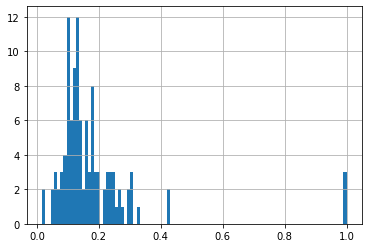

In [139]:
final_jacc_triples["Jaccard_similarity"].hist(bins=100)

In [18]:
#### TARGET

In [59]:
Triples_target_final = pd.read_csv("./Data/Input/DISNET/Triples_target_final.tsv", sep='\t')
Triples_target_final = Triples_target_final.drop(["Unnamed: 0"],axis=1)

In [60]:
Triples_target_final = Triples_target_final.drop(["gene_id","score"],axis=1)

In [61]:
Triples_target_final = Triples_target_final.drop_duplicates()

In [63]:
df_jaccard_distance_target = []
disease1_list = Triples_target_final["disease_id"].to_list()
disease2_list = Triples_target_final["disease_new"].to_list()

for disease1,disease2 in zip(disease1_list,disease2_list):
    print(disease1,disease2)
    try:
        value = value_jaccard(disease1,disease2)
        df_jaccard_distance_target.append(value)  
    except:
        print("No se puede calcular")
        df_jaccard_distance_target.append("Na")
    

C0030567 C1263846
C0006142 C0029456
C0006142 C1962963
No se puede calcular
C0006142 C2911643
No se puede calcular
C0006142 C4554622
No se puede calcular
C0376358 C0029456
C0376358 C1962963
No se puede calcular
C0376358 C2911643
No se puede calcular
C0376358 C4554622
No se puede calcular
C0003873 C0032580
C0003873 C0007102
C0003873 C0346629
C0003873 C0699790
No se puede calcular
C0003873 C0009402
C0003873 C2984278
No se puede calcular
C0003873 C3542412
No se puede calcular
C0003873 C4722085
No se puede calcular
C0003873 C0242379
C0003873 C0684249
C0003873 C1306460
No se puede calcular
C0003873 C0006142
C0003873 C0678222
C0003873 C3897071
No se puede calcular
C0003873 C0376358
C0003873 C0600139
No se puede calcular
C0003873 C2984325
No se puede calcular
C0003873 C3541264
No se puede calcular
C0003873 C0004096
C0003873 C2984299
No se puede calcular
C0003873 C0238198
C0030567 C0242350
C0030567 C1961100
No se puede calcular
C0007134 C0003873
C0007134 C0004153
C0007134 C0006413
C0007134 C000

C0021390 C0037274
C0021390 C0038013
C0021390 C0038363
C0021390 C0039103
C0021390 C0039483
C0021390 C0039503
C0021390 C0040147
C0021390 C0041321
C0021390 C0042164
C0021390 C0042900
C0021390 C0079773
C0021390 C0085074
C0021390 C0149922
C0021390 C0242459
C0021390 C1260899
C0021390 C2607914
C0021390 C3495559
C0026769 C0001403
C0026769 C0001627
C0026769 C0002171
C0026769 C0002880
C0026769 C0002994
C0026769 C0003868
C0026769 C0003872
C0026769 C0003873
C0026769 C0004096
C0026769 C0004364
C0026769 C0005138
C0026769 C0006114
C0026769 C0006444
C0026769 C0006846
C0026769 C0010346
C0026769 C0011606
C0026769 C0011608
C0026769 C0011615
C0026769 C0011616
C0026769 C0014742
C0026769 C0015230
C0026769 C0015397
C0026769 C0018621
No se puede calcular
C0026769 C0019829
C0026769 C0021390
C0026769 C0022548
C0026769 C0023052
C0026769 C0023646
C0026769 C0024138
C0026769 C0024141
C0026769 C0024301
C0026769 C0024305
C0026769 C0026857
C0026769 C0026948
C0026769 C0027726
C0026769 C0030807
C0026769 C0033860
C002676

C0003873 C0013238
C0003873 C0022575
C0003873 C0026764
C0003873 C0027819
C0003873 C0033860
C0003873 C0524910
C0026769 C0001144
C0026769 C0001261
C0026769 C0003175
C0026769 C0006277
C0026769 C0006309
C0026769 C0010674
C0026769 C0011581
C0026769 C0018081
C0026769 C0023860
C0026769 C0031099
C0026769 C0031350
C0026769 C0032064
C0026769 C0032285
C0026769 C0034362
C0026769 C0035854
C0026769 C0037199
C0026769 C0039128
C0026769 C0042029
C0010674 C0001144
C0010674 C0001261
C0010674 C0003175
C0010674 C0006277
C0010674 C0006309
C0010674 C0011581
C0010674 C0018081
C0010674 C0023860
C0010674 C0026769
C0010674 C0031099
C0010674 C0031350
C0010674 C0032064
C0010674 C0032285
C0010674 C0034362
C0010674 C0035854
C0010674 C0037199
C0010674 C0039128
C0010674 C0042029
C0024623 C0007131
C0024623 C0007137
C0024623 C0011991
C0024623 C0023269
C0024623 C0030193
C0024623 C0278996
C0024623 C0376358
C0024623 C0678222
C0376358 C0007131
C0376358 C0007137
C0376358 C0011991
C0376358 C0023269
C0376358 C0024623
C0376358 C

In [64]:
Triples_target_final["Jaccard_distance"] = df_jaccard_distance_target

In [65]:
final_jacc_triples_tar = Triples_target_final[Triples_target_final["Jaccard_distance"]!= "Na"]

In [ ]:
final_jacc_triples_tar["Jaccard_similarity"] = 1-final_jacc_triples_tar["Jaccard_distance"]

In [67]:
final_jacc_triples_tar["Jaccard_similarity"].mean()

0.14911327992283466

<AxesSubplot:>

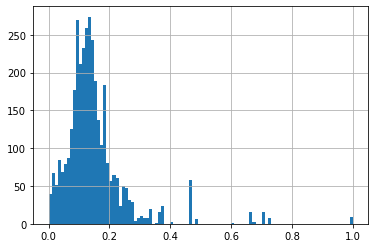

In [157]:
final_jacc_triples_tar["Jaccard_similarity"].hist(bins=100)

### DISNET SIMILARITY

In [158]:
my_array_simi.mean()

0.054319646663177096

In [160]:
df_simi_disnet = pd.DataFrame(my_array_simi)

In [186]:
df_simi_disnet["score"] = df_simi_disnet

In [183]:
df_simi_disnet = df_simi_disnet.rename(columns={"0": "score"})

# MATRIX

In [14]:
def generate(disease_feature, diseases, features):
   
    """Function that from a list of relationships disease-feature obtains the
    feature matrix, so that rows are diseases and columns are features.
    """
   
   
    dis_feat_dict = { i : list() for i in diseases}
   
    disease_feature_array = disease_feature.to_numpy()
   
    for [disease, feature] in disease_feature_array:
       
        if not feature in dis_feat_dict[disease]:
            dis_feat_dict[disease].append(feature)
           
    bool_matr = [[0 for x in range(len(features))] for y in range(len(diseases))]
   
    count_dis = 0   
    for dis in diseases:       
        count_feat = 0       
        for feat in features:           
            if feat in dis_feat_dict[dis]:               
                bool_matr[count_dis][count_feat] = 1               
            count_feat += 1           
        count_dis += 1
   
    feature_matrix = pd.DataFrame(bool_matr)
    return feature_matrix
#------------------------------------------------------------------------------

# STATISTICS

In [69]:
stats.ttest_ind(final_jacc_triples_tar["Jaccard_similarity"],final_jacc_triples["Jaccard_similarity"])

Ttest_indResult(statistic=-2.8622086453262656, pvalue=0.00423095377603685)

In [177]:
mannwhitneyu(final_jacc_triples_tar["Jaccard_similarity"],final_jacc_triples["Jaccard_similarity"])

MannwhitneyuResult(statistic=170261.0, pvalue=0.005436883992004191)

In [68]:
mannwhitneyu(final_jacc_triples_random["Jaccard_similarity"],final_jacc_triples["Jaccard_similarity"])

MannwhitneyuResult(statistic=157840.5, pvalue=4.036728165730348e-17)